# **DEEP LEARNING**

Name: **ACTIVATION FUNCTION**  
Date : 2023  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid

$$f(x) = \frac{1}{1+e^{-x}}$$

In [2]:
def sigmoid(x):
  return 1/(1+math.exp(-x))

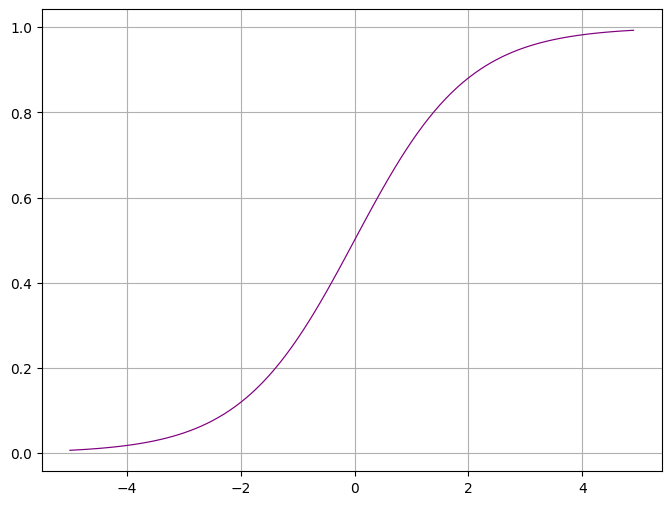

In [3]:
X = np.arange(-5,5,0.1)
Fx = []
for x in X :
  Fx.append(sigmoid(x))

plt.figure(figsize=(8, 6))
plt.plot(X,Fx,color="purple",linewidth=0.87)
plt.grid()
plt.show()

- Lorsque x est inférieure à -2, la valeur de f(x) est proche de 0
- Lorsque x est supérieure à 2, la valeur de f(x) est proche de 1
Cela entrave le bon apprentissage du réseau car sa capacité de mise à jour descend drastiquement : Vanish gradient

### Derivée

$$f'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = f(x)(1-(f(x))$$

In [4]:
def sigmoide_derivee(x):
  return sigmoid(x)*(1-sigmoid(x))

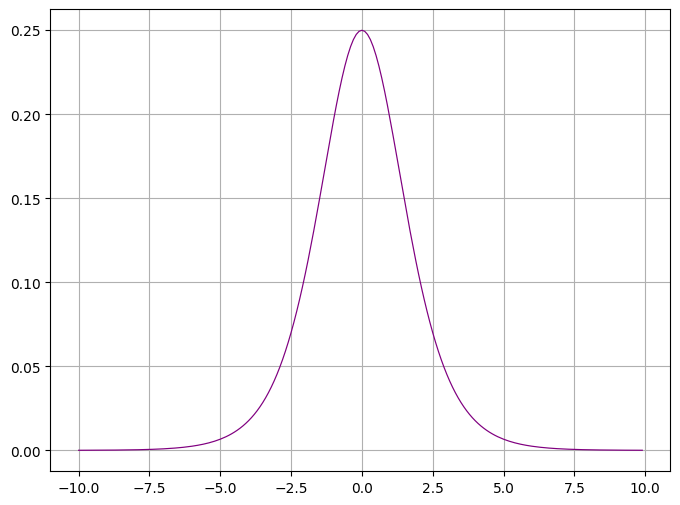

In [5]:
X = np.arange(-10,10,0.1)
dFx = []
for x in X :
  dFx.append(sigmoide_derivee(x))

plt.figure(figsize=(8, 6))
plt.plot(X,dFx,color="purple",linewidth=0.87)
plt.grid()
plt.show()

## Tangente hyperbolique

$$f(x) = \frac{e^x - e^{-x}}{e^x - e^{-x}}$$

In [6]:
def tangente_hyperbolique(x):
  return ((math.exp(x)-math.exp(-x)) / (math.exp(x)+math.exp(-x)))

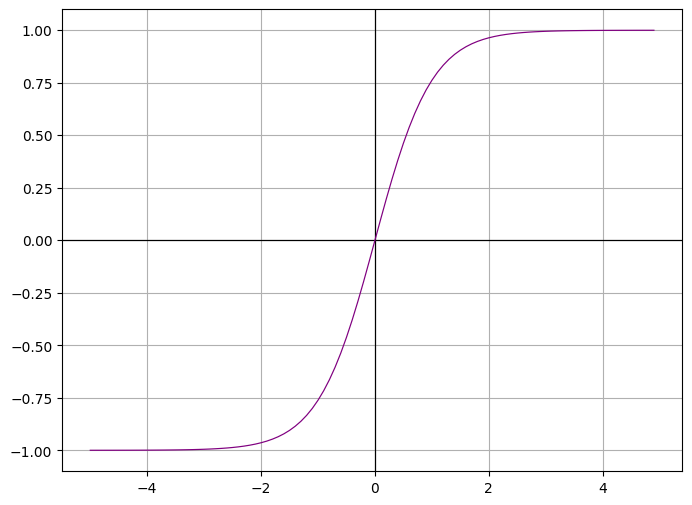

In [7]:
X = np.arange(-5,5,0.1)
Fx = []
for x in X :
  Fx.append(tangente_hyperbolique(x))

plt.figure(figsize=(8, 6))
plt.grid()
plt.axhline(0,color="black",linewidth=0.87)
plt.axvline(0,color="black",linewidth=0.87)
plt.plot(X,Fx,color="purple",linewidth=0.87)
plt.show()

- Concentre les valeurs entre -1 et 1.
- La fonction est zéro centrée
- Permet de modéliser des valeurs fortement positives, négatives ou neutre

In [8]:
def tangente_hyperbolique_derivee(x):
  return (1-(tangente_hyperbolique(x)**2))

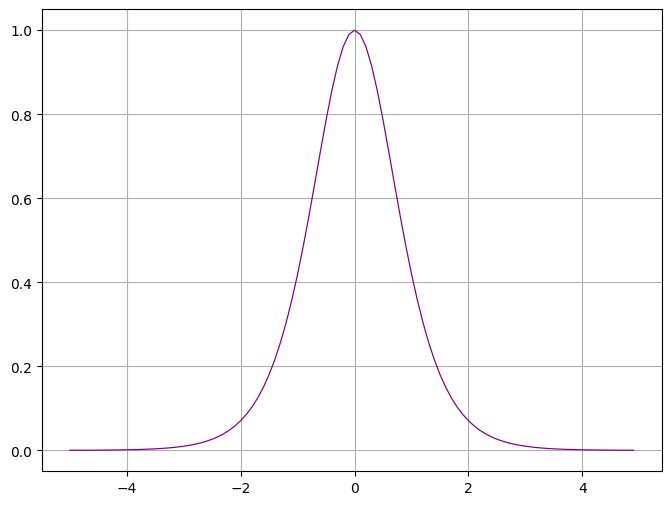

In [9]:
X = np.arange(-5,5,0.1)
dFx = []
for x in X :
  dFx.append(tangente_hyperbolique_derivee(x))

plt.figure(figsize=(8, 6))
plt.plot(X,dFx,color="purple",linewidth=0.87)
plt.grid()
plt.show()

## Rectified Linear Unit (ReLU)

$$f(x) = max(0,x) = \left\{
    \begin{array}{ll}
        0 & \text{if }  x< 0 \\
        x & \text{if }  x\geq 0 \\
    \end{array}
\right.$$

In [10]:
def relu(x):
  #max(0,x)
  if (x < 0):
    return 0
  else :
    return x

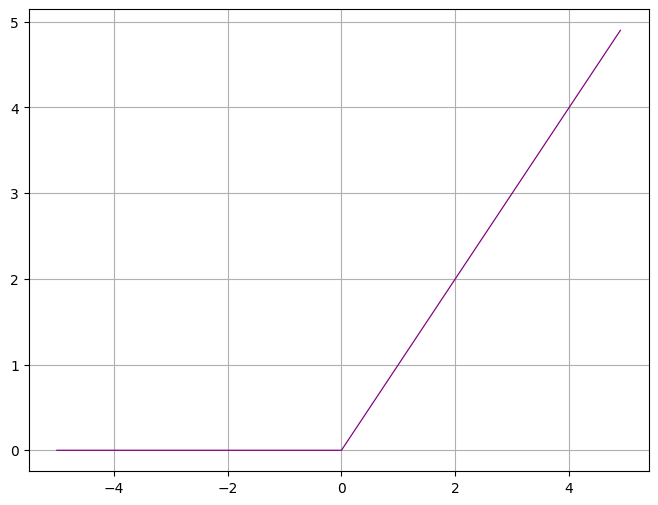

In [11]:
X = np.arange(-5,5,0.1)
Fx = []
for x in X :
  Fx.append(relu(x))

plt.figure(figsize=(8, 6))
plt.plot(X,Fx,color="purple",linewidth=0.87)
plt.grid()
plt.show()

Les valeurs négatives sont transformées en zéro

In [12]:
def relu_derivee(x):
  if (x>=0):
    return 1
  else :
    return 0

$$f'(x) = \left\{
    \begin{array}{ll}
        1 & \text{if }  x \geq 0 \\
        0 & \text{otherwise }  \\
    \end{array}
\right.$$

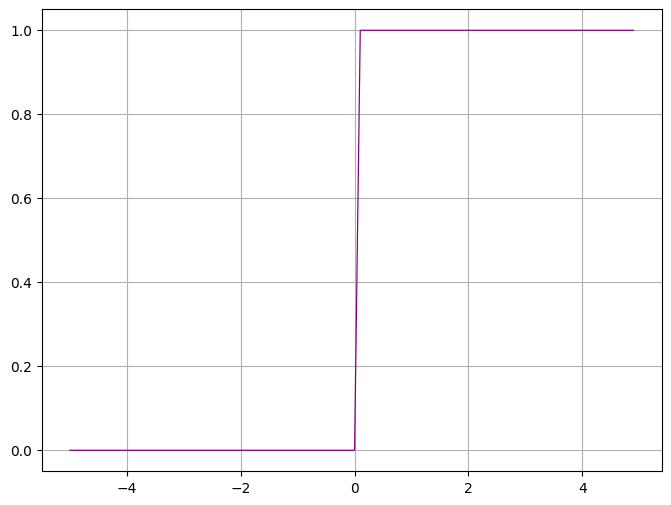

In [13]:
X = np.arange(-5,5,0.1)
dFx = []
for x in X :
  dFx.append(relu_derivee(x))

plt.figure(figsize=(8, 6))
plt.plot(X,dFx,color="purple",linewidth=0.87)
plt.grid()
plt.show()

Cela pose également des problèmes d'apprentissage - En particulier le problème de "la mort de ReLU" - . Cela se produit lorsque les valeurs d'entrées sont négatives et cela bloque l'apprentissage car nous ne pouvons pas différencier 0

## Leaky ReLU

$$f(x) = max(0.01x,x) = \left\{
    \begin{array}{ll}
        0.01x & \text{if }  x< 0 \\
        x & \text{if }  x\geq 0 \\
    \end{array}
\right.$$

In [14]:
def leaky_relu(x):
  if (x < 0):
    return 0.01*x
  else :
    return x

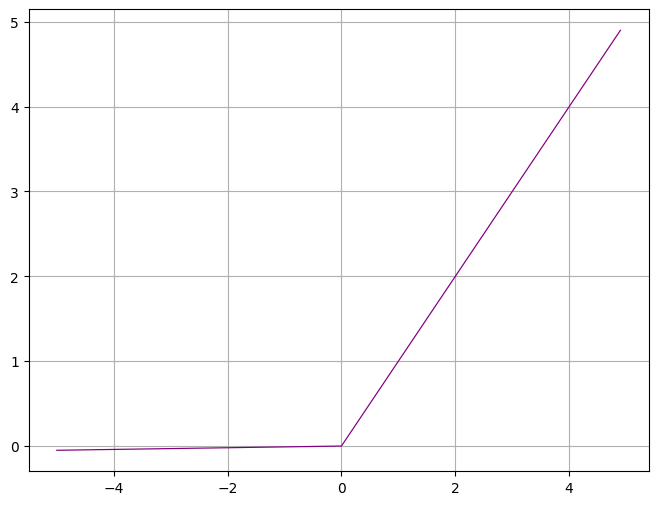

In [15]:
X = np.arange(-5,5,0.1)
Fx = []
for x in X :
  Fx.append(leaky_relu(x))

plt.figure(figsize=(8, 6))
plt.plot(X,Fx,color="purple",linewidth=0.87)
plt.grid()
plt.show()

On observe que la ligne descend sous le zéro.
Cela permet de résoudre les problème de la "mort du ReLu" énoncés précédemment

In [16]:
def leaky_relu_derivee(x):
  if (x>=0):
    return 1
  else :
    return 0.01

$$f'(x) = \left\{
    \begin{array}{ll}
        1 & \text{if }  x \geq 0 \\
        0.01 & \text{otherwise }  \\
    \end{array}
\right.$$

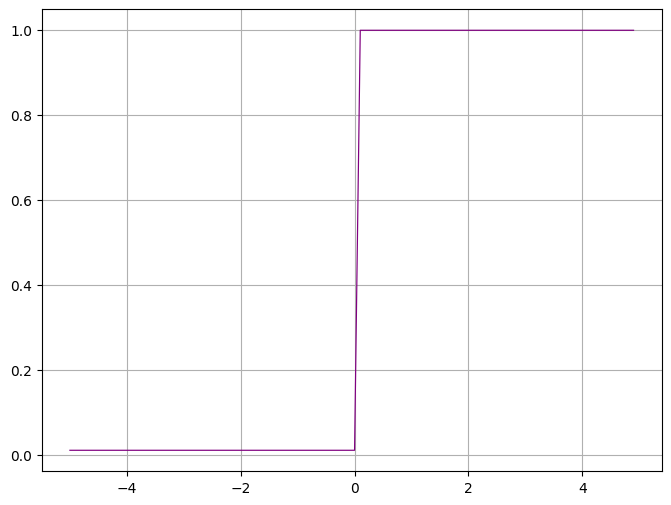

In [17]:
X = np.arange(-5,5,0.1)
dFx = []
for x in X :
  dFx.append(leaky_relu_derivee(x))

plt.figure(figsize=(8, 6))
plt.plot(X,dFx,color="purple",linewidth=0.87)
plt.grid()
plt.show()

## Softmax

L'objectif de la fonction softmax est de normaliser des vecteurs contenant K éléments en une distribution de probabilités.  
Pour cette raison, la fonction softmax est généralement utilisée dans la couche de sortie pour prédire la probabilité d'appartenance à une classe donnée.

$$f(x) = \frac{e}{\sum^K_{k=1}e^{x_k}}$$

$$f'(x) = \frac{e^{x_i}}{\sum^K_{k=1}e^{x_k}} - \frac{(e^{x_i})^2}{(\sum^K_{k=1}e^{x_k})^2}$$

In [18]:
def softmax(vecteur, x):

  somme = 0
  for k in range(0,len(vecteur)):
    somme += math.exp(vecteur[k])

  return math.exp(x)/somme

In [19]:
vecteur = [2.9,-3,6]
sommeProbabilites = 0
for i in range (0,len(vecteur)):
  sommeProbabilites += softmax(vecteur,vecteur[i])
  print( vecteur[i],"->",softmax(vecteur,vecteur[i]))

print("Somme des probabilités : ",sommeProbabilites)

2.9 -> 0.04310216500873915
-3 -> 0.00011807600261088977
6 -> 0.95677975898865
Somme des probabilités :  1.0
